In [2]:
from sklearn.model_selection import train_test_split #for splitting the data in train and test
from sklearn.preprocessing import MinMaxScaler #for various scaling methods
from sklearn.linear_model import LogisticRegression #for LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,recall_score #for accuracy matrices
from sklearn.metrics import precision_score,classification_report,roc_auc_score,precision_score #for accuracy matrices

In [3]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import matplotlib.style as style
%matplotlib inline
style.use('ggplot')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter("ignore")

pd.pandas.set_option('display.max_columns',None)

In [4]:
df = pd.read_csv('classification_dataset.csv')
df.head()

,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,year,month,Target
0,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,1
1,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,0
2,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,1
3,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,0
4,12625.800781,-34.603684,-58.381559,22,10,0.0,11.5,76,10,27,34,72,0.0,1025,10,99,2016,3,0


In [5]:
df.shape

(155223, 19)

In [7]:
df.columns

Index(['density_per_km', 'latitude', 'longitude', 'maxtempC', 'mintempC',
       'totalSnow_cm', 'sunHour', 'moon_illumination', 'DewPointC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'visibility', 'winddirDegree', 'year', 'month', 'Target'],
      dtype='object')

In [8]:
# Total no of duplicate rows
df.duplicated().sum()

79878

In [9]:
# Remove duplicate rows
df = df.drop_duplicates(keep='first', inplace=False)

## Feature Scaling

In [10]:
feature_scale = [feature for feature in df.columns if feature in ['density_per_km','precipMM']]

scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([df[['Target','latitude', 'longitude', 'maxtempC', 'mintempC',
       'totalSnow_cm', 'sunHour', 'moon_illumination', 'DewPointC',
       'WindGustKmph', 'cloudcover', 'humidity', 'pressure',
       'visibility', 'winddirDegree', 'year', 'month']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],axis=1)

data.head()

,Target,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,pressure,visibility,winddirDegree,year,month,density_per_km,precipMM
0,1,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,1018,10,189,2016,3,0.505636,0.000000
1,0,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,1018,10,189,2016,3,0.505636,0.000000
2,0,-34.603684,-58.381559,22,10,0.0,11.5,76,10,27,34,72,1025,10,99,2016,3,0.505636,0.000000
3,1,-34.603684,-58.381559,22,10,0.0,11.5,76,10,27,34,72,1025,10,99,2016,3,0.505636,0.000000
4,0,-34.603684,-58.381559,22,18,0.0,8.6,26,15,17,61,78,1015,8,105,2016,4,0.505636,0.097011


# Train Test split

In [11]:
X = data.drop('Target',axis=1)
y = data['Target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.50,random_state=10) #train test split in 50:50 ratio

In [12]:
X_train.head()

,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,pressure,visibility,winddirDegree,year,month,density_per_km,precipMM
18866,6.402013,-72.554634,25,13,0.0,11.6,11,17,6,40,90,1012,6,248,2016,4,0.000897,0.149179
39309,11.240355,-74.211023,17,10,0.0,11.6,53,10,11,20,74,1015,10,143,2016,8,0.011305,0.002931
70300,8.992761,-79.518348,30,25,0.0,11.9,56,23,11,37,79,1011,10,161,2017,6,0.324189,0.000879
49555,1.805165,-75.888340,19,13,0.0,11.6,36,13,8,41,86,1016,8,247,2016,11,0.003224,0.107855
27057,0.504929,-76.500191,22,20,0.0,7.8,48,21,6,75,98,1016,9,139,2016,5,0.001310,0.036928


# Logistic Regression

In [13]:
logic_r = LogisticRegression() 
logic_r.fit(X_train,y_train) 
prediction = logic_r.predict(X_test)

In [14]:
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[14958  5351]
 [11035  6329]]
0.5650465850874632
              precision    recall  f1-score   support

           0       0.58      0.74      0.65     20309
           1       0.54      0.36      0.44     17364

    accuracy                           0.57     37673
   macro avg       0.56      0.55      0.54     37673
weighted avg       0.56      0.57      0.55     37673



### K Fold Cross Validation

In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold_validation=KFold(10)

model = LogisticRegression() 
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print('Max :',np.max(results))
print('Min :',np.min(results))
print('Mean :',np.mean(results))

[0.65905773 0.58725946 0.56337094 0.55593895 0.55063039 0.55282718
 0.54220865 0.35718078 0.42991771 0.50066366]
Max : 0.6590577305905773
Min : 0.35718078046190604
Mean : 0.5299055447642


### Stratified K-fold Cross Validation

In [64]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=10)
model = LogisticRegression() 
scores=cross_val_score(model,X,y,cv=skfold)
print(np.mean(scores))

0.5061089836668768


In [65]:
scores

array([0.54107498, 0.5734572 , 0.56350365, 0.52368945, 0.54744526,
       0.56278205, 0.50331829, 0.28524024, 0.49508893, 0.46548978])

In [66]:
print('Max :',np.max(scores))
print('Min :',np.min(scores))
print('Mean :',np.mean(scores))

Max : 0.573457199734572
Min : 0.28524024422617467
Mean : 0.5061089836668768


## Graphical Analysis

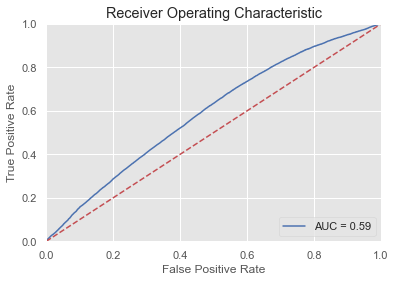

In [23]:
from sklearn.metrics import roc_curve, auc

probs               = logic_r.predict_proba(X_test)
preds               = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc             = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Tuning the model using grid searchCV
Logistic regression does not really have any critical hyperparameters to tune.

- Sometimes, you can see useful differences in performance or convergence with different solvers (solver).

1. solver in ['newton-cg', 'lbfgs', 'liblinear','sag','saga']
- Regularization (penalty) can sometimes be helpful.

2. penalty in ['none','l1', 'l2', 'elasticnet']
- Note: not all solvers support all regularization terms.

- The C parameter controls the penality strength, which can also be effective.
3. C in [100, 10, 1.0, 0.1, 0.01]

In [15]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression() 

# define models and parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1', 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

cv = KFold(n_splits=10)

grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=cv, scoring='accuracy',error_score=0,verbose=2)
grid_result = grid_search.fit(X_train,y_train)
# summarize results

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....................C=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=100, penalty=l1

[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END .................C=

[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time= 1.7min
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=  52.2s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=  47.1s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time= 1.9min
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time= 1.3min
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time= 1.8min
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=  49.3s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   1.5s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   2.5s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   1.4s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   2.5s
[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   1.6s
[CV] END ................C=0

In [16]:
accuracy = grid_result.best_score_
accuracy

0.5734760663195918

In [17]:
grid_result.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}

## Model with parameters

In [28]:
log_model = LogisticRegression(C=1.0, penalty= 'l2', solver= 'liblinear',class_weight='balanced') 
log_model.fit(X_train,y_train) 
log_model_pred = log_model.predict(X_test)
print(confusion_matrix(y_test,log_model_pred))
print(accuracy_score(y_test,log_model_pred))
print(classification_report(y_test,log_model_pred))

[[11258  9051]
 [ 7305 10059]]
0.5658429113688849
              precision    recall  f1-score   support

           0       0.61      0.55      0.58     20309
           1       0.53      0.58      0.55     17364

    accuracy                           0.57     37673
   macro avg       0.57      0.57      0.57     37673
weighted avg       0.57      0.57      0.57     37673



In [27]:
log_model = LogisticRegression(C=1.0, penalty= 'l2', solver= 'liblinear') 
log_model.fit(X_train,y_train) 
log_model_pred = log_model.predict(X_test)
print(confusion_matrix(y_test,log_model_pred))
print(accuracy_score(y_test,log_model_pred))
print(classification_report(y_test,log_model_pred))

[[14547  5762]
 [10482  6882]]
0.5688158628195259
              precision    recall  f1-score   support

           0       0.58      0.72      0.64     20309
           1       0.54      0.40      0.46     17364

    accuracy                           0.57     37673
   macro avg       0.56      0.56      0.55     37673
weighted avg       0.56      0.57      0.56     37673



## Graphical Analysis

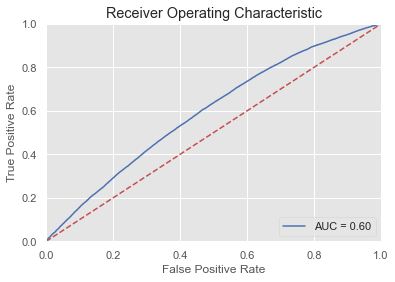

In [24]:
from sklearn.metrics import roc_curve, auc

probs               = log_model.predict_proba(X_test)
preds               = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc             = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [20]:
print('Accuracy before tuning :',accuracy_score(y_test,prediction))
print()
print('Accuracy after tuning :',accuracy_score(y_test,log_model_pred))

Accuracy before tuning : 0.5650465850874632

Accuracy after tuning : 0.5688158628195259
